In [1]:
import pandas as pd

In [2]:
dados=pd.read_csv('Dados/aluguel_residencial.csv', sep=';')

In [4]:
# Criando lista de bairros de meu interesse
bairros = ['Copacabana', 'Tijuca', 'Barra da Tijuca', 'Ipanema']

In [9]:
# Deixando no Dataframe só os dados que eu quero, de acordo com a lista que criei
sel=dados.Bairro.isin(bairros)
dados=dados[sel]


In [10]:
# Agupando os dados pelo atributo que eu quero
grupo_bairro=dados.groupby('Bairro')

In [13]:
grupo_bairro.Valor.mean().round(2)

Bairro
Barra da Tijuca    7071.92
Copacabana         4135.91
Ipanema            9375.91
Tijuca             2042.19
Name: Valor, dtype: float64

In [14]:
grupo_bairro.Valor.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3922.0,7071.92,11803.49,0.0,2500.0,4500.0,8500.0,600000.0
Copacabana,2760.0,4135.91,3596.62,0.0,2000.0,3000.0,4800.0,35000.0
Ipanema,1800.0,9375.91,8224.56,1200.0,4500.0,7000.0,11000.0,90000.0
Tijuca,1113.0,2042.19,1655.30,750.0,1500.0,1800.0,2300.0,45000.0


In [17]:
grupo_bairro.Valor.aggregate(['min', 'max', 'mean']).rename(columns={'min':'Mínimo', 'max':'Máximo', 'mean':'Média'})

,Mínimo,Máximo,Média
Bairro,,,
Barra da Tijuca,0.0,600000.0,7071.918154
Copacabana,0.0,35000.0,4135.914493
Ipanema,1200.0,90000.0,9375.905000
Tijuca,750.0,45000.0,2042.194070


In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(30,30))

Text(0.5,1,'Desvio Padrão do Valor por Bairro')

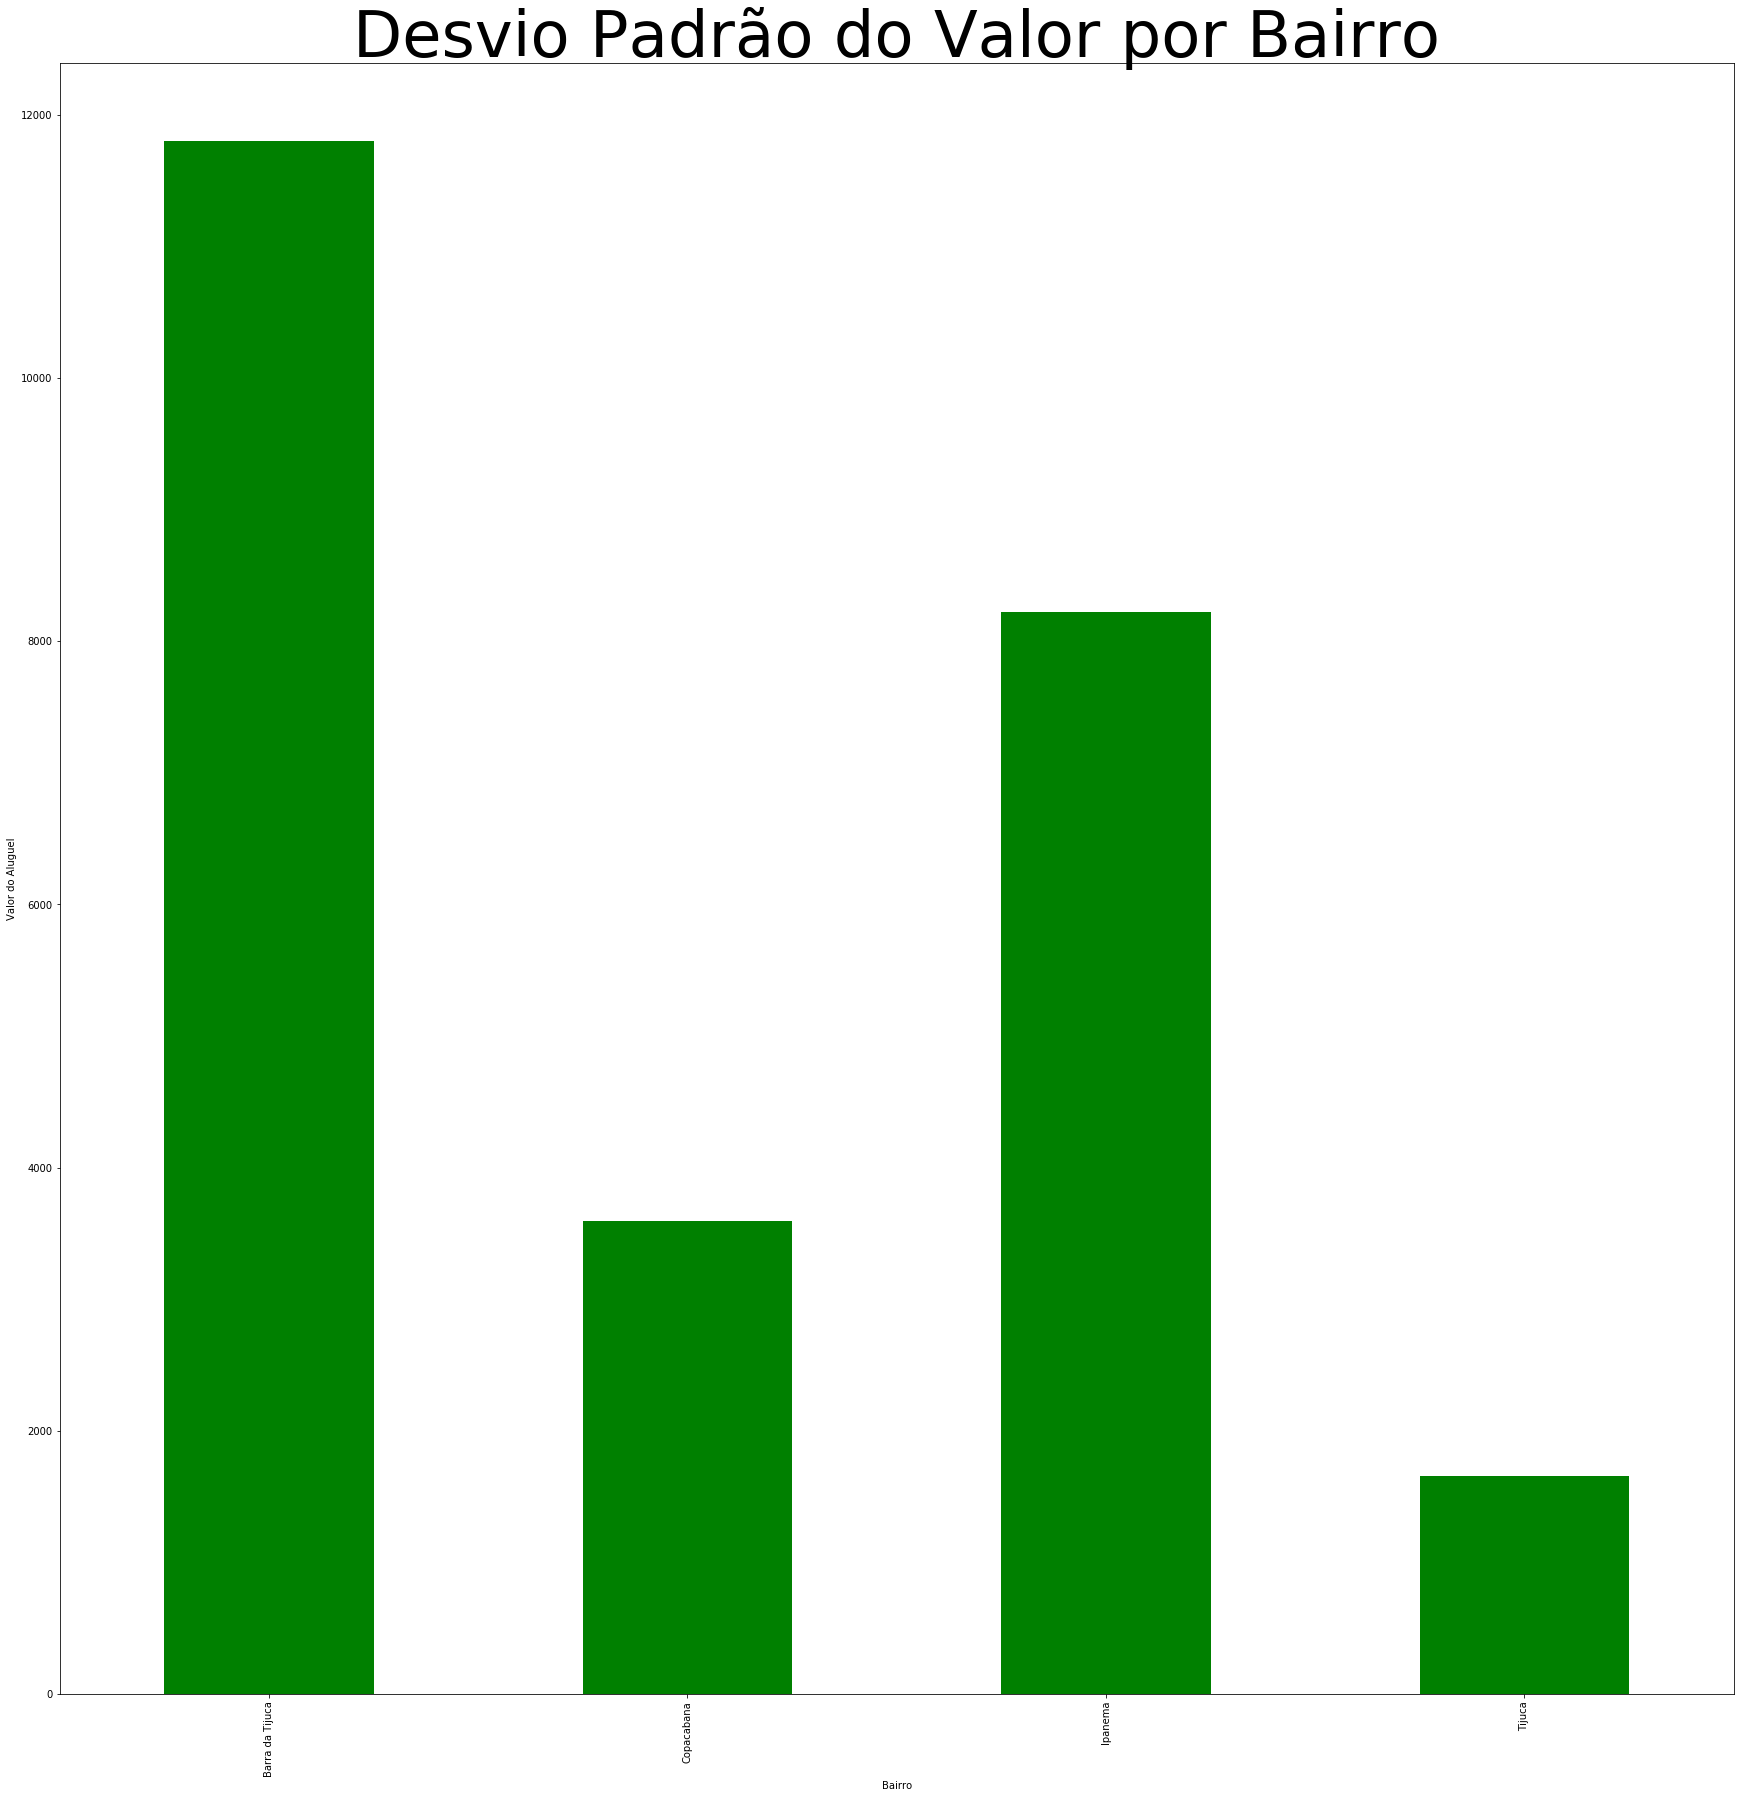

In [35]:
fig=grupo_bairro.Valor.std().plot.bar(color='green')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Desvio Padrão do Valor por Bairro',{'fontsize':64})

In [36]:
classes=[0,2,4,6,100]

In [50]:
quartos=pd.cut(dados.Quartos, classes)

In [38]:
quartos.head()

0     (0, 2]
6     (4, 6]
11    (0, 2]
12    (0, 2]
13    (2, 4]
Name: Quartos, dtype: category
Categories (4, interval[int64]): [(0, 2] < (2, 4] < (4, 6] < (6, 100]]

In [40]:
pd.value_counts(quartos)

(2, 4]      4905
(0, 2]      4189
(4, 6]       428
(6, 100]      23
Name: Quartos, dtype: int64

In [41]:
type(quartos)

pandas.core.series.Series

In [43]:
dados=pd.read_csv('Dados/aluguel_residencial.csv',sep=';')

In [59]:
agrupamento=dados.groupby('Quartos').Valor.mean().round(2)

In [60]:
agrupamento[0:3].mean()

2024.0933333333335